<a href="https://colab.research.google.com/github/raquelvargas16/MIAR-Python-Activities/blob/main/Proyecto_RN_Enunciado_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Nos aseguramos que tenemos instalada la última versión de la API de Kaggle en Colab
!pip install --upgrade --force-reinstall --no-deps kaggle

  Using cached kaggle-1.6.11-py3-none-any.whl
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.6.11
    Uninstalling kaggle-1.6.11:
      Successfully uninstalled kaggle-1.6.11


In [2]:
!pip install opendatasets

In [3]:
# from google.colab import files
# files.upload()

In [4]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf

In [5]:
print(tf.__version__)

2.15.0


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
import opendatasets as od

In [8]:
# dataset = "https://www.kaggle.com/datasets/gpiosenka/100-bird-species/download?datasetVersionNumber=65"
# od.download(dataset)

In [9]:
ls 100-bird-species/

 birds.csv  'EfficientNetB0-525-(224 X 224)- 98.97.h5'   test/   train/   valid/


In [10]:
batch_size = 32
img_height = 224
img_width = 224

In [11]:
data_dir = "100-bird-species/train/"
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.89,
  subset="training",
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 84635 files belonging to 525 classes.
Using 9310 files for training.


In [12]:
data_dir_val = "100-bird-species/valid/"
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir_val,
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2625 files belonging to 525 classes.


In [13]:
data_dir_test = "100-bird-species/test/"
test_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir_test,
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2625 files belonging to 525 classes.


In [14]:
class_names = train_ds.class_names
print(class_names)

['ABBOTTS BABBLER', 'ABBOTTS BOOBY', 'ABYSSINIAN GROUND HORNBILL', 'AFRICAN CROWNED CRANE', 'AFRICAN EMERALD CUCKOO', 'AFRICAN FIREFINCH', 'AFRICAN OYSTER CATCHER', 'AFRICAN PIED HORNBILL', 'AFRICAN PYGMY GOOSE', 'ALBATROSS', 'ALBERTS TOWHEE', 'ALEXANDRINE PARAKEET', 'ALPINE CHOUGH', 'ALTAMIRA YELLOWTHROAT', 'AMERICAN AVOCET', 'AMERICAN BITTERN', 'AMERICAN COOT', 'AMERICAN DIPPER', 'AMERICAN FLAMINGO', 'AMERICAN GOLDFINCH', 'AMERICAN KESTREL', 'AMERICAN PIPIT', 'AMERICAN REDSTART', 'AMERICAN ROBIN', 'AMERICAN WIGEON', 'AMETHYST WOODSTAR', 'ANDEAN GOOSE', 'ANDEAN LAPWING', 'ANDEAN SISKIN', 'ANHINGA', 'ANIANIAU', 'ANNAS HUMMINGBIRD', 'ANTBIRD', 'ANTILLEAN EUPHONIA', 'APAPANE', 'APOSTLEBIRD', 'ARARIPE MANAKIN', 'ASHY STORM PETREL', 'ASHY THRUSHBIRD', 'ASIAN CRESTED IBIS', 'ASIAN DOLLARD BIRD', 'ASIAN GREEN BEE EATER', 'ASIAN OPENBILL STORK', 'AUCKLAND SHAQ', 'AUSTRAL CANASTERO', 'AUSTRALASIAN FIGBIRD', 'AVADAVAT', 'AZARAS SPINETAIL', 'AZURE BREASTED PITTA', 'AZURE JAY', 'AZURE TANAGER', '

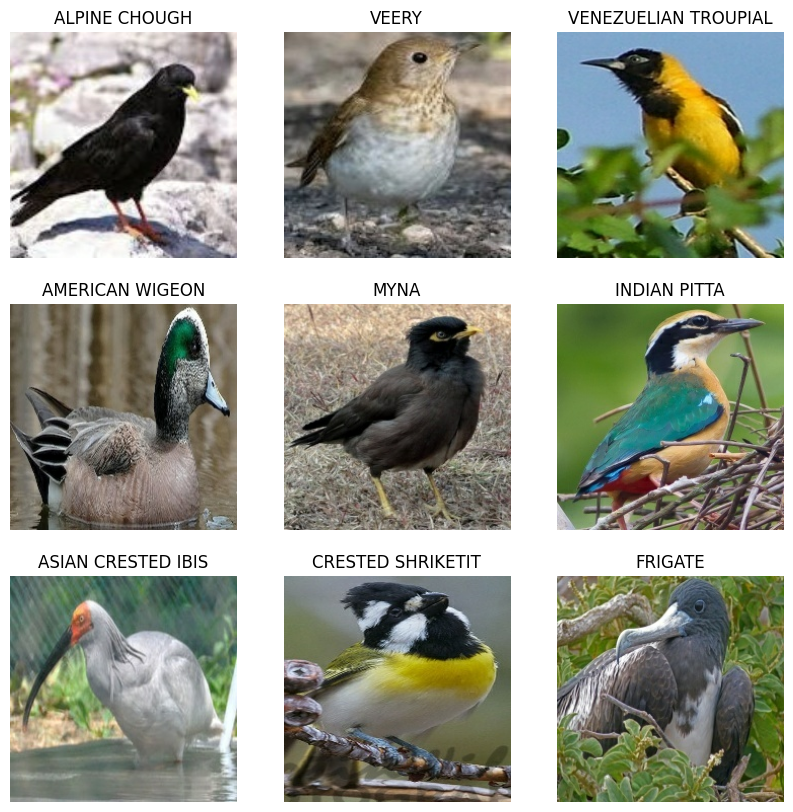

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [16]:
AUTOTUNE = tf.data.AUTOTUNE
num_classes = 525
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Red Convolucional 1

In [17]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [18]:
gpus = tf.config.experimental.list_physical_devices('GPU')
print(gpus)
#tf.config.set_visible_devices([], 'CPU') # hide the CPU
tf.config.set_visible_devices(gpus[0], 'GPU') # unhide potentially hidden GPU
tf.config.get_visible_devices()

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

### Red Convolucional vista en clase (3 bloques)

In [19]:
# Construccion de una red CNN
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.models import Model

# 1.BASE MODEL
input = layers.Input(shape = (224, 224, 3))
# Bloque 1
x1 = layers.Rescaling(1./255)
x1 = layers.Conv2D(32, (3,3), padding='same', activation='relu')(input)
x1 = layers.BatchNormalization()(x1)
x1 = layers.Conv2D(32, (3,3), padding='same', activation='relu')(x1)
x1 = layers.BatchNormalization()(x1)
x1 = layers.MaxPooling2D(pool_size=(2,2))(x1)
# Bloque 2
x2 = layers.Conv2D(64, (3, 3), padding='same', activation='relu')(x1)
x2 = layers.BatchNormalization()(x2)
x2 = layers.Conv2D(64, (3, 3), padding='same', activation='relu')(x2)
x2 = layers.BatchNormalization()(x2)
x2 = layers.MaxPooling2D(pool_size=(2,2))(x2)
# Bloque 3
x3 = layers.Conv2D(128, (3, 3), padding='same', activation='relu')(x2)
x3 = layers.BatchNormalization()(x3)
x3 = layers.Conv2D(128, (3, 3), padding='same', activation='relu')(x3)
x3 = layers.BatchNormalization()(x3)
x3 = layers.MaxPooling2D(pool_size=(2,2))(x3)
# 2.TOP MODEL
gap = layers.GlobalAvgPool2D()(x3)
predictions = layers.Dense(num_classes, activation='softmax')(gap)

# 3. Unimos las entradas y salidas del modelo
convnet = Model(inputs=input, outputs=predictions)
convnet.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 224, 224, 32)      128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 32)      9248      
                                                                 
 batch_normalization_1 (Bat  (None, 224, 224, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 32)      0     

In [20]:
from tensorflow.keras.optimizers import Adam
# Compilación
convnet.compile(optimizer=Adam(learning_rate=0.001),
                loss="sparse_categorical_crossentropy",
                metrics=["accuracy"]
                )

In [21]:
import keras
# Callbacks
callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)
# Entrenamos el modelo
H_callback = convnet.fit(train_ds,
                         batch_size=256,
                         epochs=100,
                         validation_data=val_ds,
                         callbacks=callback)

Epoch 1/100
291/291 [==============================] - 69s 188ms/step - loss: 6.0142 - accuracy: 0.0116 - val_loss: 6.1596 - val_accuracy: 0.0171
Epoch 2/100
291/291 [==============================] - 47s 160ms/step - loss: 5.5077 - accuracy: 0.0319 - val_loss: 6.1986 - val_accuracy: 0.0229
Epoch 3/100
291/291 [==============================] - 47s 161ms/step - loss: 5.1890 - accuracy: 0.0536 - val_loss: 5.9676 - val_accuracy: 0.0251
Epoch 4/100
291/291 [==============================] - 47s 162ms/step - loss: 4.9228 - accuracy: 0.0754 - val_loss: 5.3543 - val_accuracy: 0.0442
Epoch 5/100
291/291 [==============================] - 47s 162ms/step - loss: 4.6776 - accuracy: 0.0969 - val_loss: 5.2243 - val_accuracy: 0.0560
Epoch 6/100
291/291 [==============================] - 46s 159ms/step - loss: 4.4552 - accuracy: 0.1219 - val_loss: 5.6133 - val_accuracy: 0.0461
Epoch 7/100
291/291 [==============================] - 47s 160ms/step - loss: 4.2476 - accuracy: 0.1472 - val_loss: 5.0741 -